In [142]:
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy.stats import uniform
import matplotlib.pyplot as plt
import tqdm.notebook as tqdm

In [215]:
def plot(title, y, y1=None, x=None, label1=None, label2=None, xlabel=None, ylabel=None):
    if x is None:
        x = [i for i in range(len(y))]
        
    fig = plt.figure()
    plt.figure(figsize=(16,6), dpi= 80)
    plt.title(title, fontsize=17)

    # Remove borders
    plt.gca().spines["top"].set_alpha(0.0)    
    plt.gca().spines["bottom"].set_alpha(0.3)
    plt.gca().spines["right"].set_alpha(0.0)    
    plt.gca().spines["left"].set_alpha(0.3)
    plt.grid(axis='both', alpha=.3)
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    plt.plot(x, y, color='tab:red',label=label1);
    if y1 is not None:
        plt.plot(x, y1, color='tab:purple',label=label2)
    plt.legend()
    plt.show();
    
def get_samples(n, teta):
    return teta * uniform.rvs(size=n)

# 1 задание

<Figure size 432x288 with 0 Axes>

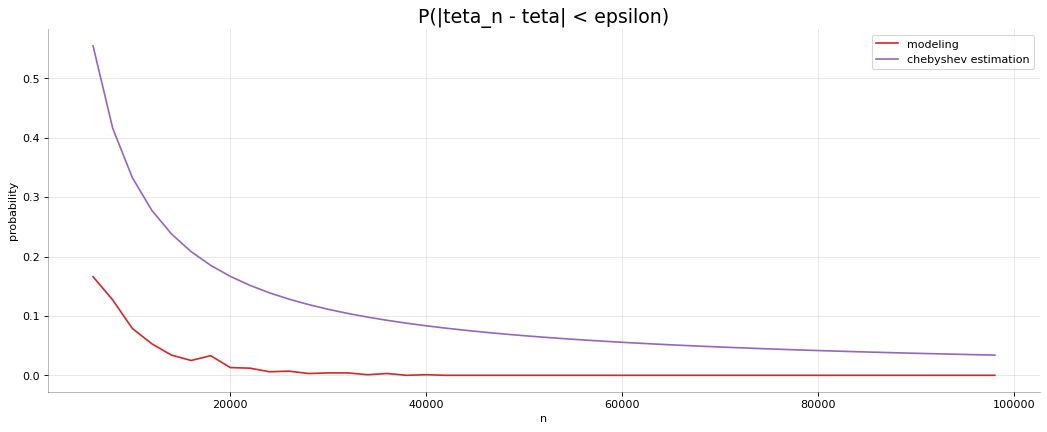

In [216]:
epsilon = 0.1
teta = 10
n = 100000
k = 1000
prob = []
cheb = []

for i in tqdm.tqdm(range(10, n, n // 50)):
    samples = teta * uniform.rvs(size=(k, i))
    teta_n = 2 * samples.mean(axis=1)
    prob.append((abs(teta_n - teta) > epsilon).mean())
    cheb.append(teta ** 2 / 3 / i / epsilon ** 2)
    

plot("P(|teta_n - teta| < epsilon)", prob[3:], cheb[3:], 
     x = list(range(10, n, n // 50))[3:], label1="modeling", 
     label2="chebyshev estimation", xlabel="n", ylabel="probability");

# 2 задание

# 3 задание

In [217]:
from scipy.stats import expon

In [237]:
def ecdf(data):
    """ Compute Empirical CDF """
    x = np.sort(data)
    n = x.size
    y = np.arange(1, n+1) / n
    function = lambda t: np.searchsorted(x, t, side='right') / n
    return function

def cdf(x):
    return np.exp(-np.exp(-x))

<Figure size 432x288 with 0 Axes>

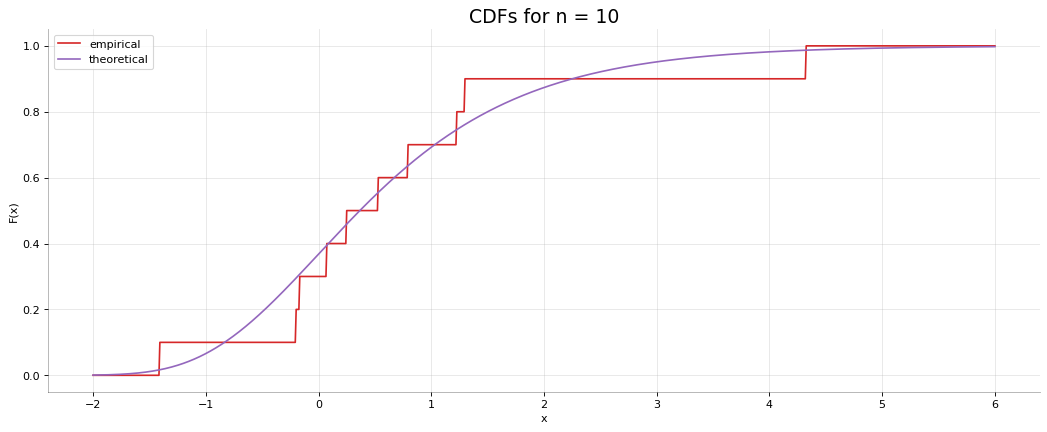

<Figure size 432x288 with 0 Axes>

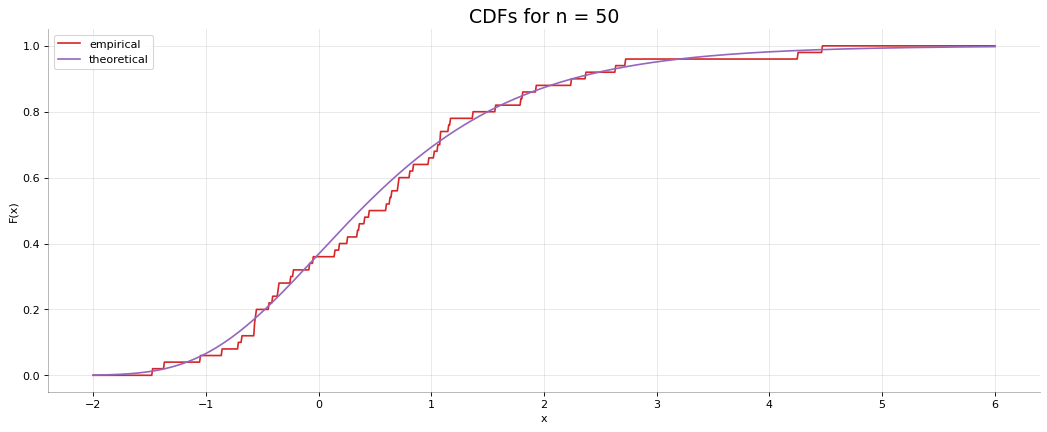

<Figure size 432x288 with 0 Axes>

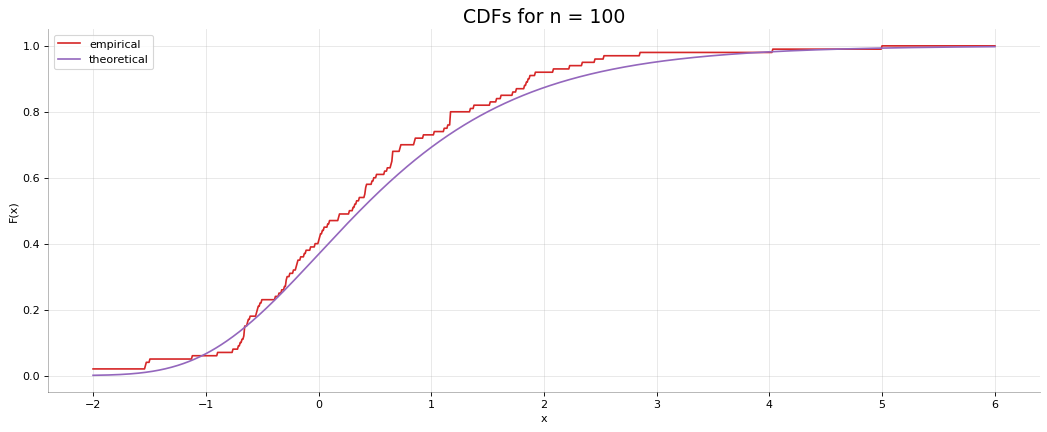

<Figure size 432x288 with 0 Axes>

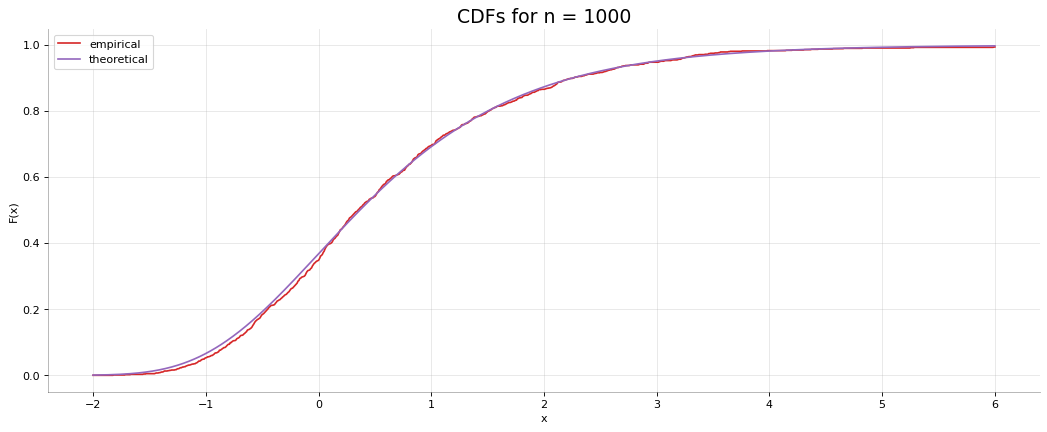

<Figure size 432x288 with 0 Axes>

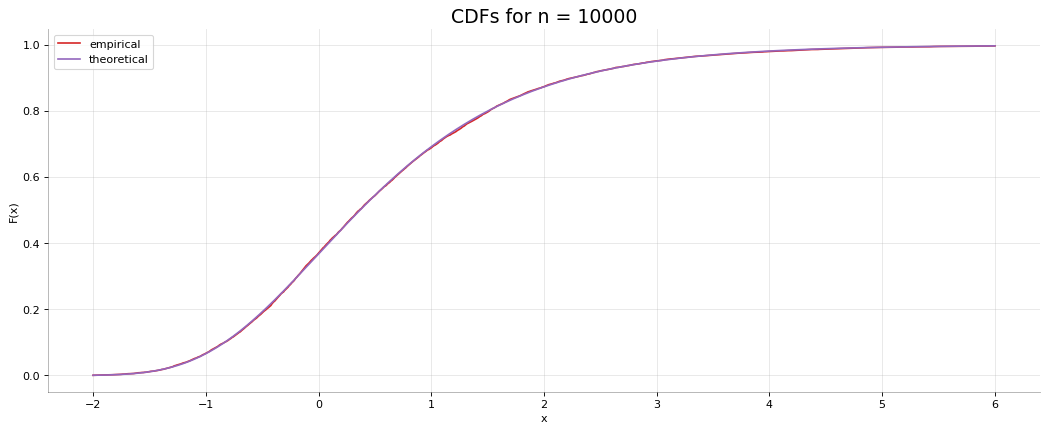

In [260]:
a = 12
n = 100
k = 1000
y1 = cdf(x)
x = np.linspace(-2, 6, 1000)

for i in [10, 50, 100, 1000, 10000]:
    data = expon.rvs(scale = 1/a, size = (i, k))
    transformed = data.max(axis=1) *  a - np.log(k)
    
    y = ecdf(transformed)(x)
    y1 = cdf(x)
    plot(f"CDFs for n = {i}", y = y, y1=y1, x = x, xlabel="x", ylabel="F(x)", 
         label1="empirical", label2="theoretical")

<Figure size 432x288 with 0 Axes>

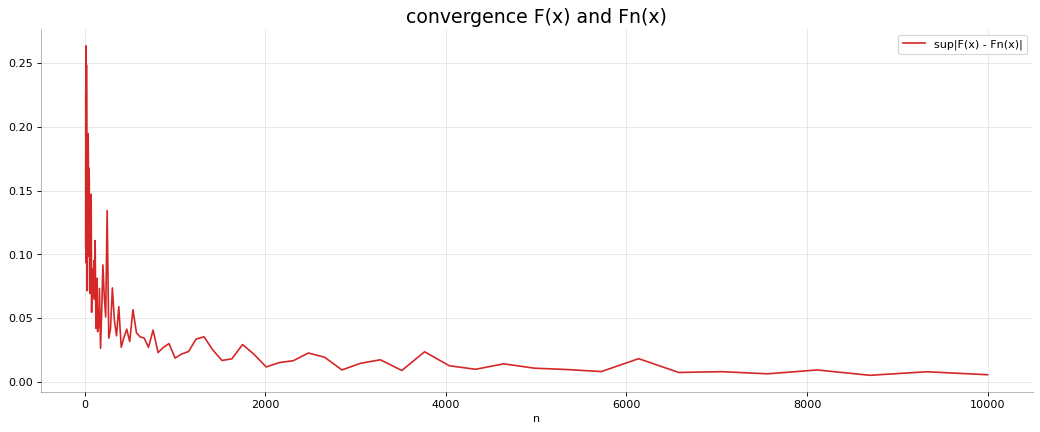

In [259]:
n = np.logspace(1, 4, num=100, dtype=int)
x = np.linspace(-2, 6, 1000)
convergence = []

for i in tqdm.tqdm(n):
    data = expon.rvs(scale = 1/a, size = (i, k))
    transformed = data.max(axis=1) *  a - np.log(k)
    y = ecdf(transformed)(transformed)
    y1 = cdf(transformed)
    
    convergence.append(abs(y - y1).max())

plot(f"convergence F(x) and Fn(x)", y = convergence, x = n, xlabel="n", label1="sup|F(x) - Fn(x)|")
    